In [1]:
!pip install mecab-python3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.8/588.8 kB 17.1 MB/s eta 0:00:00


In [2]:
!pip install unidic
!python -m unidic download

  Preparing metadata (setup.py) ... done
  Created wheel for unidic: filename=unidic-1.1.0-py3-none-any.whl size=7403 sha256=87b7d49dd2689775006263bd092a6cb550dbb2e0213c13e4dabfb19aa7f379af
  Stored in directory: /root/.cache/pip/wheels/4c/c6/ae/d243f0d01ea936ab42ee7e820463dcb837079e73764060352d
Successfully built unidic
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.3
    Uninstalling wasabi-1.1.3:
      Successfully uninstalled wasabi-1.1.3
download url: https://cotonoha-dic.s3-ap-northeast-1.amazonaws.com/unidic-3.1.0.zip
Dictionary version: 3.1.0+2021-08-31
unidic-3.1.0.zip: 100% 526M/526M [00:31<00:00, 16.6MB/s]
Finished download.
Downloaded UniDic v3.1.0+2021-08-31 to /usr/local/lib/python3.11/dist-packages/unidic/dicdir


In [3]:
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

In [41]:
import os
import re
import pandas as pd
import unicodedata
from IPython.display import display

# CSVファイルの読み込み
text_file_path = "/content/drive/MyDrive/merged_df2_v3.csv"  # アップロードしたファイルのパス
stock_file_path = "/content/drive/MyDrive/df_savedJ-Quants_year8.csv"
secotr_file_path = "/content/drive/MyDrive/J-Quants_sector.csv"
text_df = pd.read_csv(text_file_path)
text_df = text_df.head(700)
stock_df = pd.read_csv(stock_file_path)
sector_df = pd.read_csv(secotr_file_path)

# 必要な列を確認して事業内容と経営方針を取得
display(text_df.columns)  # 列名を確認
display(stock_df.columns)
display(sector_df.columns)

# 欠損値を削除
text_df = text_df.dropna(subset=['事業の内容', '経営方針','証券コード'])

# 証券コードを整数型に変換
text_df['証券コード'] = text_df['証券コード'].astype(int)

# 証券コードの末尾に"0"を追加
stock_df["証券コード"] = stock_df["証券コード"].astype(str) + "0"
stock_df.drop_duplicates(subset=['証券コード'], inplace=True)

#33業種番号と17業種番号をint型に変換後、str型に変換
sector_df = sector_df.dropna(subset=["33業種番号", "17業種番号"])
sector_df["33業種番号"] = sector_df["33業種番号"].astype(int)
sector_df["17業種番号"] = sector_df["17業種番号"].astype(int)
sector_df["33業種番号"] = sector_df["33業種番号"].astype(str)
sector_df["17業種番号"] = sector_df["17業種番号"].astype(str)

# 事業内容と経営方針を一つのテキストとして結合
text_df['テキスト'] = text_df['事業の内容'] + " " + text_df['経営方針']

#書類名、docID、EDINETコード、決算期、事業の内容、経営方針のカラムを削除
text_df = text_df.drop(columns=['書類名','docID', 'ＥＤＩＮＥＴコード', '決算期', '事業の内容', '経営方針'])
stock_df = stock_df.drop(columns=['提出日_180日後', '調整日'])

display(text_df)
display(stock_df)
display(sector_df)

Index(['会社名', '書類名', 'docID', '証券コード', 'ＥＤＩＮＥＴコード', '決算期', '提出日', '提出者業種',
       '事業の内容', '経営方針'],
      dtype='object')

Index(['証券コード', '提出日', '提出日_180日後', '調整日', '終値'], dtype='object')

Index(['証券コード', '33業種番号', '33業種名', '17業種番号', '17業種名'], dtype='object')

,会社名,証券コード,提出日,提出者業種,テキスト
0,株式会社長府製作所,59460,2023-03-30,金属製品,３【事業の内容】当社グループは、当社及び連結子会社３社（㈱大阪テクノクラート、㈱インサイトエ...
1,江崎グリコ株式会社,22060,2023-03-30,食料品,３【事業の内容】当社グループは、当社並びに子会社26社及び関連会社３社により構成されており、...
2,ロイヤルホールディングス株式会社,81790,2023-03-30,小売業,３【事業の内容】当社グループ（当社及び当社の関係会社）は、当社、子会社７社及び関連会社３社で...
3,清和中央ホールディングス株式会社,75310,2023-03-30,卸売業,３ 【事業の内容】当社グループは、持株会社としての当社と、事業会社としての連結子会社４社及び...
7,不二精機株式会社,64000,2023-03-30,機械,３【事業の内容】当社グループは、当社及び連結子会社５社により構成されており、主にプラスチック...
...,...,...,...,...,...
694,株式会社エコス,75200,2022-05-27,小売業,３ 【事業の内容】当企業集団は、株式会社エコス（当社）及び子会社は６社（連結子会社４社及び非...
695,株式会社スーパーバリュー,30940,2022-05-27,小売業,３【事業の内容】当社は、食品スーパー（以下、「ＳＭ」という。）とホームセンター（以下、「ＨＣ...
696,株式会社昴,97780,2022-05-27,サービス業,３【事業の内容】当社グループは、当社及び子会社１社で構成されており、幼児、小学生、中学生、高...
697,株式会社ライフフーズ,30650,2022-05-27,小売業,３ 【事業の内容】当社の事業は、料理、飲食物の調理・販売を主とし、和食を中心としたレストラン...


,証券コード,提出日,終値
0,59460,2023-03-30,"[2192.0, 2225.0, 2257.0, 2287.0, 2231.0, 2195...."
1,22060,2023-03-30,"[3340.0, 3335.0, 3400.0, 3420.0, 3385.0, 3410...."
2,81790,2023-03-30,"[2756.0, 2787.0, 2769.0, 2767.0, 2713.0, 2708...."
3,64000,2023-03-30,"[326.0, 337.0, 338.0, 340.0, 338.0, 340.0, 336..."
4,21930,2023-03-30,"[203.0, 209.0, 211.0, 213.0, 211.0, 207.0, 203..."
...,...,...,...
469,30540,2022-05-17 00:00:00,"[461.0, 456.0, 455.0, 458.0, 462.0, 466.0, 468..."
470,98430,2022-05-20 00:00:00,"[12335.0, 12505.0, 12320.0, 12935.0, 12730.0, ..."
471,22940,2022-05-20 00:00:00,"[2423.0, 2408.0, 2446.0, 2363.0, 2406.0, 2403...."
472,81680,2022-05-25 00:00:00,"[938.0, 946.0, 955.0, 974.0, 973.0, 975.0, 960..."


,証券コード,33業種番号,33業種名,17業種番号,17業種名
0,59460,3550,金属製品,3,建設・資材
1,22060,3050,食料品,1,食品
2,81790,6100,小売業,14,小売
3,75310,6050,卸売業,13,商社・卸売
4,64000,3600,機械,8,機械
...,...,...,...,...,...
615,26680,6050,卸売業,13,商社・卸売
616,82730,6100,小売業,14,小売
617,49200,3200,化学,4,素材・化学
618,23380,5250,情報･通信業,10,情報通信・サービスその他


In [42]:
def clean_text(text):
    """
    テキストから不要な文字や記号を削除し、整形する関数。
    """
    # 章番号や記号（例: "３ 【事業の内容】" や "１ 【経営方針】"）を削除
    text = re.sub(r'\d+\s*【.*?】', '', text)

    #Unicode正規化
    text = unicodedata.normalize('NFKC', text)
    # 余分な空白や改行を削除
    #text = re.sub(r'\s+', ' ', text)
    #・,「」,()を削除
    text = re.sub('・', '', text)
    text = re.sub('「', '', text)
    text = re.sub('」', '', text)
    text = re.sub(r'\(', '（', text)
    text = re.sub(r'\)', '）', text)
    #(株)→株式会社
    text = text.replace('（株）', '株式会社')
    # 丸括弧で囲まれた番号を削除（例: "(１)"）
    text = re.sub(r'（\d+）', '', text)
    text = re.sub('（', '', text)
    text = re.sub('）', '', text)
    text = re.sub('〔', '', text)
    text = re.sub('〕', '', text)
    text = re.sub(r'\.', '', text)
    text = re.sub(r'『', '', text)
    text = re.sub(r'』', '', text)
    text = re.sub(r'《', '', text)
    text = re.sub(r'》', '', text)
    # 連続するピリオドを削除
    #text = re.sub(r'\.{2,}', '', text)
    # ダブルクオーテーションを削除
    #text = text.replace('"', '')


    # 前後の空白を削除
    return text.strip()

# "事業の内容" と "経営方針" カラムに対して再クリーンアップを適用
text_df['テキスト'] = text_df['テキスト'].apply(clean_text)

# 再度確認用に最初の数行を表示
text_df[['会社名','テキスト']].head()


,会社名,テキスト
0,株式会社長府製作所,当社グループは、当社及び連結子会社3社株式会社大阪テクノクラート、株式会社インサイトエナジー...
1,江崎グリコ株式会社,当社グループは、当社並びに子会社26社及び関連会社3社により構成されており、主として食料品製...
2,ロイヤルホールディングス株式会社,当社グループ当社及び当社の関係会社は、当社、子会社7社及び関連会社3社で構成され、外食事業、...
3,清和中央ホールディングス株式会社,当社グループは、持株会社としての当社と、事業会社としての連結子会社4社及び非連結子会社1社で...
7,不二精機株式会社,当社グループは、当社及び連結子会社5社により構成されており、主にプラスチックを加工するための...


In [43]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 658 entries, 0 to 699
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   会社名     658 non-null    object
 1   証券コード   658 non-null    int64 
 2   提出日     658 non-null    object
 3   提出者業種   658 non-null    object
 4   テキスト    658 non-null    object
dtypes: int64(1), object(4)
memory usage: 47.0+ KB


In [44]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   証券コード   474 non-null    object
 1   提出日     474 non-null    object
 2   終値      474 non-null    object
dtypes: object(3)
memory usage: 11.2+ KB


In [45]:
sector_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 581 entries, 0 to 619
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   証券コード   581 non-null    int64 
 1   33業種番号  581 non-null    object
 2   33業種名   581 non-null    object
 3   17業種番号  581 non-null    object
 4   17業種名   581 non-null    object
dtypes: int64(1), object(4)
memory usage: 27.2+ KB


In [46]:
# 両方のデータフレームで証券コードを文字列型に変換
text_df["証券コード"] = text_df["証券コード"].astype(str)
stock_df["証券コード"] = stock_df["証券コード"].astype(str)
sector_df["証券コード"] = sector_df["証券コード"].astype(str)

# `提出日` を文字列として処理
stock_df['提出日'] = stock_df['提出日'].apply(lambda x: x.split(' ')[0] if x.endswith(' 00:00:00') else x)

text_df['提出日'] = text_df['提出日'].astype(str)
stock_df['提出日'] = stock_df['提出日'].astype(str)

print(text_df.info())
print(stock_df.info())
print(sector_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 658 entries, 0 to 699
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   会社名     658 non-null    object
 1   証券コード   658 non-null    object
 2   提出日     658 non-null    object
 3   提出者業種   658 non-null    object
 4   テキスト    658 non-null    object
dtypes: object(5)
memory usage: 47.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   証券コード   474 non-null    object
 1   提出日     474 non-null    object
 2   終値      474 non-null    object
dtypes: object(3)
memory usage: 11.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 581 entries, 0 to 619
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   証券コード   581 non-null    object
 1   33業種番号  581 non-null    object
 2   33業種名   581 non-null    o

In [47]:
print(text_df)
print(stock_df)

                  会社名  証券コード         提出日  提出者業種  \
0           株式会社長府製作所  59460  2023-03-30   金属製品   
1           江崎グリコ株式会社  22060  2023-03-30    食料品   
2    ロイヤルホールディングス株式会社  81790  2023-03-30    小売業   
3    清和中央ホールディングス株式会社  75310  2023-03-30    卸売業   
7            不二精機株式会社  64000  2023-03-30     機械   
..                ...    ...         ...    ...   
694           株式会社エコス  75200  2022-05-27    小売業   
695      株式会社スーパーバリュー  30940  2022-05-27    小売業   
696             株式会社昴  97780  2022-05-27  サービス業   
697        株式会社ライフフーズ  30650  2022-05-27    小売業   
699       株式会社スタジオアリス  23050  2022-05-27  サービス業   

                                                  テキスト  
0    当社グループは、当社及び連結子会社3社株式会社大阪テクノクラート、株式会社インサイトエナジー...  
1    当社グループは、当社並びに子会社26社及び関連会社3社により構成されており、主として食料品製...  
2    当社グループ当社及び当社の関係会社は、当社、子会社7社及び関連会社3社で構成され、外食事業、...  
3    当社グループは、持株会社としての当社と、事業会社としての連結子会社4社及び非連結子会社1社で...  
7    当社グループは、当社及び連結子会社5社により構成されており、主にプラスチックを加工するための...  
..                                           

In [48]:
# `提出日` と `証券コード` の両方で結合
merged_df = pd.merge(stock_df, text_df, on=['提出日','証券コード'], how='inner')
merged_df = pd.merge(merged_df, sector_df, on=['証券コード'], how='inner')
merged_df.info()

# 証券コードまたは終値が空白（NaN）の行を削除
merged_df = merged_df.dropna()

merged_df = merged_df.sort_index()
print(merged_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   証券コード   574 non-null    object
 1   提出日     574 non-null    object
 2   終値      574 non-null    object
 3   会社名     574 non-null    object
 4   提出者業種   574 non-null    object
 5   テキスト    574 non-null    object
 6   33業種番号  574 non-null    object
 7   33業種名   574 non-null    object
 8   17業種番号  574 non-null    object
 9   17業種名   574 non-null    object
dtypes: object(10)
memory usage: 45.0+ KB
     証券コード         提出日                                                 終値  \
0    59460  2023-03-30  [2192.0, 2225.0, 2257.0, 2287.0, 2231.0, 2195....   
1    22060  2023-03-30  [3340.0, 3335.0, 3400.0, 3420.0, 3385.0, 3410....   
2    81790  2023-03-30  [2756.0, 2787.0, 2769.0, 2767.0, 2713.0, 2708....   
3    64000  2023-03-30  [326.0, 337.0, 338.0, 340.0, 338.0, 340.0, 336...   
4    21930  2023-03-30  [203.0, 209.

In [49]:
merged_df['提出日'] = pd.to_datetime(merged_df['提出日'])
merged_df = merged_df.sort_values(by=['証券コード', '提出日'], ascending=[True, False])
merged_df = merged_df.drop_duplicates(subset=['証券コード'], keep='first')
merged_df = merged_df.sort_index()
print(merged_df)

     証券コード        提出日                                                 終値  \
0    59460 2023-03-30  [2192.0, 2225.0, 2257.0, 2287.0, 2231.0, 2195....   
1    22060 2023-03-30  [3340.0, 3335.0, 3400.0, 3420.0, 3385.0, 3410....   
2    81790 2023-03-30  [2756.0, 2787.0, 2769.0, 2767.0, 2713.0, 2708....   
3    64000 2023-03-30  [326.0, 337.0, 338.0, 340.0, 338.0, 340.0, 336...   
4    21930 2023-03-30  [203.0, 209.0, 211.0, 213.0, 211.0, 207.0, 203...   
..     ...        ...                                                ...   
569  23000 2023-05-31  [479.0, 482.0, 482.0, 484.0, 482.0, 475.0, 477...   
570  30540 2022-05-17  [461.0, 456.0, 455.0, 458.0, 462.0, 466.0, 468...   
571  98430 2022-05-20  [12335.0, 12505.0, 12320.0, 12935.0, 12730.0, ...   
572  22940 2022-05-20  [2423.0, 2408.0, 2446.0, 2363.0, 2406.0, 2403....   
573  82540 2022-05-25  [304.0, 314.0, 296.0, 290.0, 323.0, 320.0, 309...   

                  会社名  提出者業種  \
0           株式会社長府製作所   金属製品   
1           江崎グリコ株式会社  

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 終値データの前処理
# 終値をリスト形式から数値の配列へ変換し、日ごとの変動率（リターン）を計算
def extract_returns(row):
    closing_prices = eval(row['終値'])  # リスト形式の文字列を実際のリストに変換
    closing_prices = np.array(closing_prices, dtype=float)  # NumPy配列に変換
    returns = np.diff(closing_prices) / closing_prices[:-1]  # (本日終値 - 前日終値) / 前日終値
    return returns

# 変動率のデータを追加
merged_df['変動率'] = merged_df.apply(extract_returns, axis=1)

# 企業ごとの変動率を結合
daily_returns = np.stack(merged_df['変動率'].values)

# 相関行列を計算
correlation_matrix = np.corrcoef(daily_returns)

# 結果をデータフレームに変換
correlation_df = pd.DataFrame(correlation_matrix, index=merged_df['会社名'], columns=merged_df['会社名'])

# 業種ごとの相関を計算
merged_df['業種'] = merged_df['提出者業種']  # 業種の列を統一
industry_list = merged_df['業種'].unique()
industry_correlation_matrix = pd.DataFrame(index=industry_list, columns=industry_list)

for industry1 in industry_list:
    for industry2 in industry_list:
        companies1 = merged_df[merged_df['業種'] == industry1]['会社名']
        companies2 = merged_df[merged_df['業種'] == industry2]['会社名']
        industry_correlation_matrix.loc[industry1, industry2] = correlation_df.loc[companies1, companies2].mean().mean()

# 結果の表示
print("企業間の相関行列：")
display(correlation_df)


企業間の相関行列：


会社名,株式会社長府製作所,江崎グリコ株式会社,ロイヤルホールディングス株式会社,不二精機株式会社,クックパッド株式会社,セーラー万年筆株式会社,キヤノン電子株式会社,オンコリスバイオファーマ株式会社,株式会社シマノ,北海道コカ・コーラボトリング株式会社,...,株式会社北の達人コーポレーション,株式会社アクアライン,フロイント産業株式会社,ユナイテッド＆コレクティブ株式会社,株式会社ビザスク,株式会社きょくとう,株式会社ハイパー,株式会社ニトリホールディングス,株式会社柿安本店,株式会社さいか屋
会社名,,,,,,,,,,,,,,,,,,,,,
株式会社長府製作所,1.000000,0.274542,0.320685,0.322641,0.248026,0.324256,0.468914,0.146109,0.370089,0.298042,...,0.052799,0.066596,0.057028,0.025465,0.094179,-0.055399,0.006107,0.000453,-0.063632,-0.095631
江崎グリコ株式会社,0.274542,1.000000,0.263770,0.205967,0.093015,0.240167,0.234265,0.076785,0.099249,0.230059,...,-0.053818,0.031509,-0.028776,-0.071870,0.040099,-0.070278,0.033531,-0.041521,-0.031624,-0.127744
ロイヤルホールディングス株式会社,0.320685,0.263770,1.000000,0.434719,0.364509,0.358123,0.467149,0.241667,0.332620,0.380789,...,0.159380,0.006143,0.043243,0.115280,0.145112,-0.071856,0.013067,0.025961,-0.018258,-0.036044
不二精機株式会社,0.322641,0.205967,0.434719,1.000000,0.265930,0.660773,0.512538,0.230714,0.341203,0.439055,...,-0.032110,0.027961,0.013812,-0.000673,0.000078,0.008803,-0.011902,-0.043552,0.000063,-0.008902
クックパッド株式会社,0.248026,0.093015,0.364509,0.265930,1.000000,0.214064,0.269812,0.341313,0.242670,0.228671,...,0.066827,-0.011556,-0.002005,0.026955,0.018445,-0.070594,0.009755,-0.058120,0.007044,-0.001439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
株式会社きょくとう,-0.055399,-0.070278,-0.071856,0.008803,-0.070594,0.080135,-0.034969,-0.038702,0.036098,-0.078953,...,0.197029,-0.005637,0.186768,0.265862,-0.001071,1.000000,-0.022018,0.091862,0.017628,0.023643
株式会社ハイパー,0.006107,0.033531,0.013067,-0.011902,0.009755,0.006920,0.029468,0.025750,-0.006972,0.043155,...,-0.013714,0.039704,0.044183,0.000396,-0.020566,-0.022018,1.000000,0.068491,0.039745,0.025198
株式会社ニトリホールディングス,0.000453,-0.041521,0.025961,-0.043552,-0.058120,0.079622,0.013773,-0.036692,-0.021700,-0.012966,...,0.005483,-0.007783,-0.022087,0.039547,0.008518,0.091862,0.068491,1.000000,0.060827,-0.088590


In [51]:
print("\n業種ごとの相関係数：")
display(industry_correlation_matrix)


業種ごとの相関係数：


,金属製品,食料品,小売業,機械,サービス業,その他製品,電気機器,医薬品,輸送用機器,化学,...,石油・石炭製品,ガラス・土石製品,ゴム製品,建設業,鉄鋼,電気・ガス業,陸運業,その他金融業,倉庫・運輸関連,非鉄金属
金属製品,0.19651,0.065746,0.011135,0.107965,0.046142,0.040711,0.071153,0.078219,0.140681,0.081997,...,0.041756,0.103746,0.201528,0.061593,0.101551,0.080845,0.10093,-0.002604,0.020166,-0.019309
食料品,0.065746,0.102431,0.016752,0.058864,0.033605,0.026566,0.043883,0.05273,0.084774,0.058299,...,0.024771,0.046989,0.131747,0.034178,0.04999,0.031086,0.030833,0.022139,0.003984,0.005549
小売業,0.011135,0.016752,0.027293,0.0116,0.013557,0.008469,0.011996,0.011522,0.018941,0.008752,...,0.000271,0.004438,0.024663,0.012955,-0.00234,-0.007494,0.003993,0.025973,0.00958,0.023768
機械,0.107965,0.058864,0.0116,0.13042,0.050583,0.038657,0.069159,0.077757,0.130889,0.078427,...,0.051804,0.094528,0.203559,0.051996,0.1013,0.090259,0.089485,0.024548,-0.009249,0.011248
サービス業,0.046142,0.033605,0.013557,0.050583,0.044093,0.021418,0.038557,0.047076,0.072632,0.040331,...,0.026014,0.048531,0.105029,0.026004,0.063797,0.020957,0.032494,0.013914,-0.002366,0.028946
その他製品,0.040711,0.026566,0.008469,0.038657,0.021418,0.079189,0.019407,0.031015,0.04051,0.030612,...,0.032445,0.045084,0.077126,0.021282,0.027194,0.041125,0.041462,0.006434,0.009434,0.002688
電気機器,0.071153,0.043883,0.011996,0.069159,0.038557,0.019407,0.080737,0.058038,0.106099,0.064258,...,0.031816,0.065928,0.153038,0.037231,0.079645,0.058856,0.037211,0.03457,-0.010751,0.025836
医薬品,0.078219,0.05273,0.011522,0.077757,0.047076,0.031015,0.058038,0.144459,0.124817,0.068899,...,0.039915,0.06793,0.173892,0.03586,0.106741,0.065407,0.059774,-0.002481,-0.004521,-0.028774
輸送用機器,0.140681,0.084774,0.018941,0.130889,0.072632,0.04051,0.106099,0.124817,1.0,0.153487,...,0.076978,0.120874,0.361979,0.05778,0.181588,0.073338,0.036197,-0.065953,0.027246,-0.050538
化学,0.081997,0.058299,0.008752,0.078427,0.040331,0.030612,0.064258,0.068899,0.153487,0.149568,...,0.043138,0.080418,0.196324,0.039769,0.090904,0.035124,0.029787,0.017899,-0.001254,0.014923


In [17]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 469 entries, 0 to 573
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   証券コード   469 non-null    object        
 1   提出日     469 non-null    datetime64[ns]
 2   終値      469 non-null    object        
 3   会社名     469 non-null    object        
 4   提出者業種   469 non-null    object        
 5   テキスト    469 non-null    object        
 6   33業種番号  469 non-null    object        
 7   33業種名   469 non-null    object        
 8   17業種番号  469 non-null    object        
 9   17業種名   469 non-null    object        
 10  変動率     469 non-null    object        
 11  業種      469 non-null    object        
dtypes: datetime64[ns](1), object(11)
memory usage: 47.6+ KB


In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 終値データの前処理
# 終値をリスト形式から数値の配列へ変換し、日ごとの変動率（リターン）を計算
def extract_returns(row):
    closing_prices = eval(row['終値'])  # リスト形式の文字列を実際のリストに変換
    closing_prices = np.array(closing_prices, dtype=float)  # NumPy配列に変換
    returns = np.diff(closing_prices) / closing_prices[:-1]  # (本日終値 - 前日終値) / 前日終値
    return returns

# 変動率のデータを追加
merged_df['変動率'] = merged_df.apply(extract_returns, axis=1)

# 企業ごとの変動率を結合
daily_returns = np.stack(merged_df['変動率'].values)

# 変動率を標準化
scaler = StandardScaler()
daily_returns_standardized = scaler.fit_transform(daily_returns.T).T  # 各企業の変動率を標準化

# 相関行列を計算（標準化後のデータを使用）
correlation_matrix = np.corrcoef(daily_returns_standardized)

# 結果をデータフレームに変換
correlation_df = pd.DataFrame(correlation_matrix, index=merged_df['会社名'], columns=merged_df['会社名'])

# 業種ごとの相関を計算
merged_df['業種'] = merged_df['提出者業種']  # 業種の列を統一
industry_list = merged_df['業種'].unique()
industry_correlation_matrix = pd.DataFrame(index=industry_list, columns=industry_list)

for industry1 in industry_list:
    for industry2 in industry_list:
        companies1 = merged_df[merged_df['業種'] == industry1]['会社名']
        companies2 = merged_df[merged_df['業種'] == industry2]['会社名']
        industry_correlation_matrix.loc[industry1, industry2] = correlation_df.loc[companies1, companies2].mean().mean()

# 結果の表示
print("企業間の相関行列（標準化後）：")
display(correlation_df)


企業間の相関行列（標準化後）：


会社名,株式会社長府製作所,江崎グリコ株式会社,ロイヤルホールディングス株式会社,不二精機株式会社,クックパッド株式会社,セーラー万年筆株式会社,キヤノン電子株式会社,オンコリスバイオファーマ株式会社,株式会社シマノ,北海道コカ・コーラボトリング株式会社,...,株式会社北の達人コーポレーション,株式会社アクアライン,フロイント産業株式会社,ユナイテッド＆コレクティブ株式会社,株式会社ビザスク,株式会社きょくとう,株式会社ハイパー,株式会社ニトリホールディングス,株式会社柿安本店,株式会社さいか屋
会社名,,,,,,,,,,,,,,,,,,,,,
株式会社長府製作所,1.000000,0.274542,0.320685,0.322641,0.248026,0.324256,0.468914,0.146109,0.370089,0.298042,...,0.052799,0.066596,0.057028,0.025465,0.094179,-0.055399,0.006107,0.000453,-0.063632,-0.095631
江崎グリコ株式会社,0.274542,1.000000,0.263770,0.205967,0.093015,0.240167,0.234265,0.076785,0.099249,0.230059,...,-0.053818,0.031509,-0.028776,-0.071870,0.040099,-0.070278,0.033531,-0.041521,-0.031624,-0.127744
ロイヤルホールディングス株式会社,0.320685,0.263770,1.000000,0.434719,0.364509,0.358123,0.467149,0.241667,0.332620,0.380789,...,0.159380,0.006143,0.043243,0.115280,0.145112,-0.071856,0.013067,0.025961,-0.018258,-0.036044
不二精機株式会社,0.322641,0.205967,0.434719,1.000000,0.265930,0.660773,0.512538,0.230714,0.341203,0.439055,...,-0.032110,0.027961,0.013812,-0.000673,0.000078,0.008803,-0.011902,-0.043552,0.000063,-0.008902
クックパッド株式会社,0.248026,0.093015,0.364509,0.265930,1.000000,0.214064,0.269812,0.341313,0.242670,0.228671,...,0.066827,-0.011556,-0.002005,0.026955,0.018445,-0.070594,0.009755,-0.058120,0.007044,-0.001439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
株式会社きょくとう,-0.055399,-0.070278,-0.071856,0.008803,-0.070594,0.080135,-0.034969,-0.038702,0.036098,-0.078953,...,0.197029,-0.005637,0.186768,0.265862,-0.001071,1.000000,-0.022018,0.091862,0.017628,0.023643
株式会社ハイパー,0.006107,0.033531,0.013067,-0.011902,0.009755,0.006920,0.029468,0.025750,-0.006972,0.043155,...,-0.013714,0.039704,0.044183,0.000396,-0.020566,-0.022018,1.000000,0.068491,0.039745,0.025198
株式会社ニトリホールディングス,0.000453,-0.041521,0.025961,-0.043552,-0.058120,0.079622,0.013773,-0.036692,-0.021700,-0.012966,...,0.005483,-0.007783,-0.022087,0.039547,0.008518,0.091862,0.068491,1.000000,0.060827,-0.088590


In [53]:
print("\n業種ごとの相関係数（標準化後）：")
display(industry_correlation_matrix)


業種ごとの相関係数（標準化後）：


,金属製品,食料品,小売業,機械,サービス業,その他製品,電気機器,医薬品,輸送用機器,化学,...,石油・石炭製品,ガラス・土石製品,ゴム製品,建設業,鉄鋼,電気・ガス業,陸運業,その他金融業,倉庫・運輸関連,非鉄金属
金属製品,0.19651,0.065746,0.011135,0.107965,0.046142,0.040711,0.071153,0.078219,0.140681,0.081997,...,0.041756,0.103746,0.201528,0.061593,0.101551,0.080845,0.10093,-0.002604,0.020166,-0.019309
食料品,0.065746,0.102431,0.016752,0.058864,0.033605,0.026566,0.043883,0.05273,0.084774,0.058299,...,0.024771,0.046989,0.131747,0.034178,0.04999,0.031086,0.030833,0.022139,0.003984,0.005549
小売業,0.011135,0.016752,0.027293,0.0116,0.013557,0.008469,0.011996,0.011522,0.018941,0.008752,...,0.000271,0.004438,0.024663,0.012955,-0.00234,-0.007494,0.003993,0.025973,0.00958,0.023768
機械,0.107965,0.058864,0.0116,0.13042,0.050583,0.038657,0.069159,0.077757,0.130889,0.078427,...,0.051804,0.094528,0.203559,0.051996,0.1013,0.090259,0.089485,0.024548,-0.009249,0.011248
サービス業,0.046142,0.033605,0.013557,0.050583,0.044093,0.021418,0.038557,0.047076,0.072632,0.040331,...,0.026014,0.048531,0.105029,0.026004,0.063797,0.020957,0.032494,0.013914,-0.002366,0.028946
その他製品,0.040711,0.026566,0.008469,0.038657,0.021418,0.079189,0.019407,0.031015,0.04051,0.030612,...,0.032445,0.045084,0.077126,0.021282,0.027194,0.041125,0.041462,0.006434,0.009434,0.002688
電気機器,0.071153,0.043883,0.011996,0.069159,0.038557,0.019407,0.080737,0.058038,0.106099,0.064258,...,0.031816,0.065928,0.153038,0.037231,0.079645,0.058856,0.037211,0.03457,-0.010751,0.025836
医薬品,0.078219,0.05273,0.011522,0.077757,0.047076,0.031015,0.058038,0.144459,0.124817,0.068899,...,0.039915,0.06793,0.173892,0.03586,0.106741,0.065407,0.059774,-0.002481,-0.004521,-0.028774
輸送用機器,0.140681,0.084774,0.018941,0.130889,0.072632,0.04051,0.106099,0.124817,1.0,0.153487,...,0.076978,0.120874,0.361979,0.05778,0.181588,0.073338,0.036197,-0.065953,0.027246,-0.050538
化学,0.081997,0.058299,0.008752,0.078427,0.040331,0.030612,0.064258,0.068899,0.153487,0.149568,...,0.043138,0.080418,0.196324,0.039769,0.090904,0.035124,0.029787,0.017899,-0.001254,0.014923


In [54]:
print(stock_df)
print(daily_returns)

     証券コード         提出日                                                 終値
0    59460  2023-03-30  [2192.0, 2225.0, 2257.0, 2287.0, 2231.0, 2195....
1    22060  2023-03-30  [3340.0, 3335.0, 3400.0, 3420.0, 3385.0, 3410....
2    81790  2023-03-30  [2756.0, 2787.0, 2769.0, 2767.0, 2713.0, 2708....
3    64000  2023-03-30  [326.0, 337.0, 338.0, 340.0, 338.0, 340.0, 336...
4    21930  2023-03-30  [203.0, 209.0, 211.0, 213.0, 211.0, 207.0, 203...
..     ...         ...                                                ...
469  30540  2022-05-17  [461.0, 456.0, 455.0, 458.0, 462.0, 466.0, 468...
470  98430  2022-05-20  [12335.0, 12505.0, 12320.0, 12935.0, 12730.0, ...
471  22940  2022-05-20  [2423.0, 2408.0, 2446.0, 2363.0, 2406.0, 2403....
472  81680  2022-05-25  [938.0, 946.0, 955.0, 974.0, 973.0, 975.0, 960...
473  82540  2022-05-25  [304.0, 314.0, 296.0, 290.0, 323.0, 320.0, 309...

[474 rows x 3 columns]
[[ 0.01505474  0.01438202  0.01329198 ...  0.         -0.00248756
  -0.01197007]
 [-0.00

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 23646 (\N{CJK UNIFIED IDEOGRAPH-5C5E}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 35069 (\N{CJK UNIFIED IDEOGRAPH-88FD}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 21697 (\N{CJK UNIFIED IDEOGRAPH-54C1}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 39135 (\N{CJK UNIFIED IDEOGRAPH-98DF}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 26009 (\N{CJK UNIFIED IDEOGRAPH-6599}) missing from fon

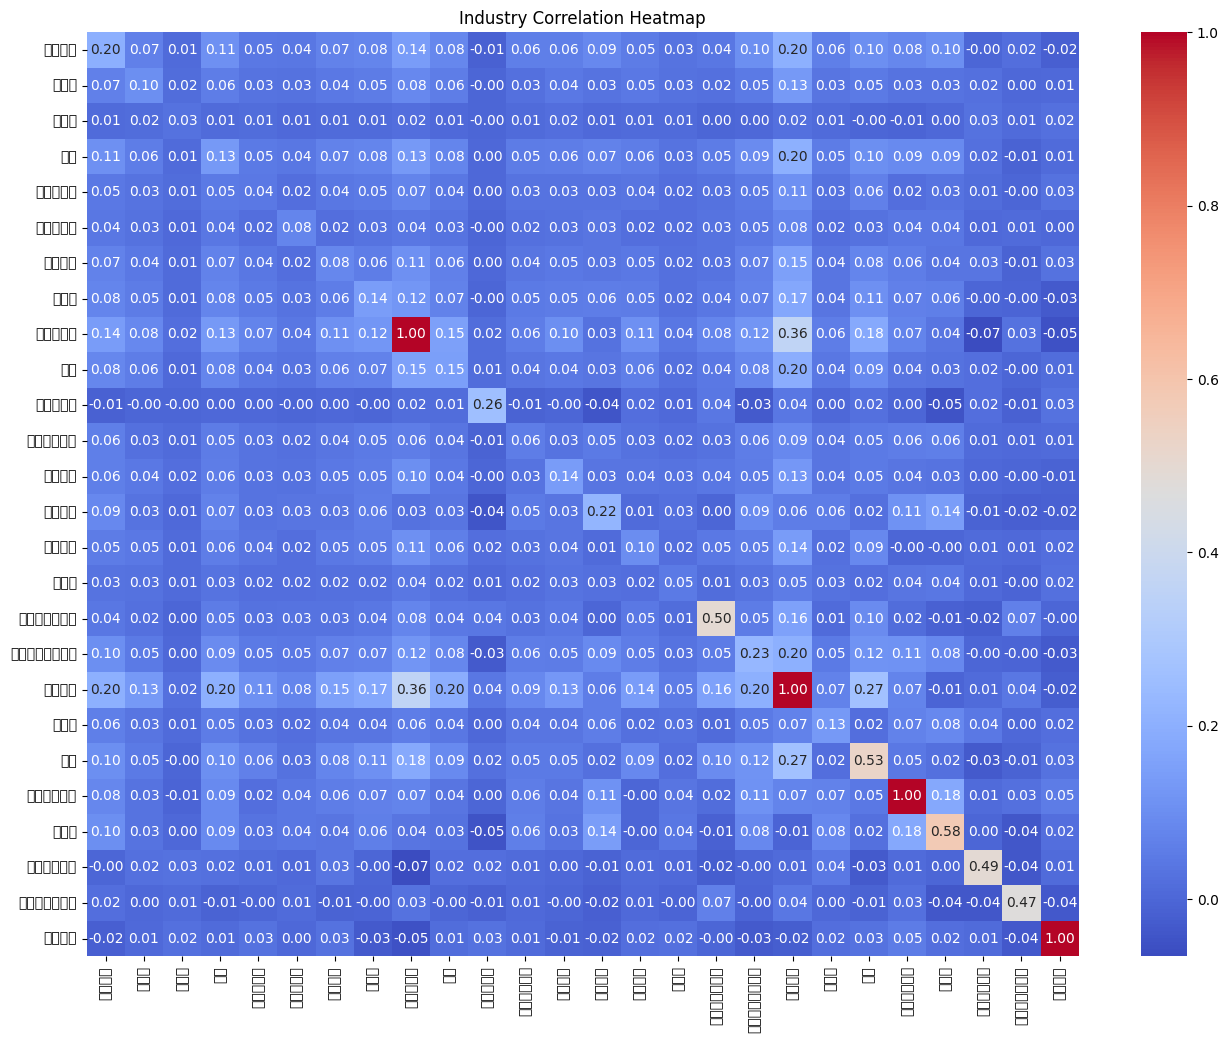

In [55]:
# 業種ごとの相関行列のヒートマップをプロット
plt.figure(figsize=(16, 12))
sns.heatmap(industry_correlation_matrix.astype(float), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Industry Correlation Heatmap")
plt.show()

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 終値データの前処理
# 終値をリスト形式から数値の配列へ変換し、日ごとの変動率（リターン）を計算
def extract_returns(row):
    closing_prices = eval(row['終値'])  # リスト形式の文字列を実際のリストに変換
    closing_prices = np.array(closing_prices, dtype=float)  # NumPy配列に変換
    returns = np.diff(closing_prices) / closing_prices[:-1]  # (本日終値 - 前日終値) / 前日終値
    return returns

# 変動率のデータを追加
merged_df['変動率'] = merged_df.apply(extract_returns, axis=1)

# 企業ごとの変動率を結合
daily_returns = np.stack(merged_df['変動率'].values)  # (企業数, 179日) の配列

# 変動率を標準化
scaler = StandardScaler()
daily_returns_standardized = scaler.fit_transform(daily_returns.T).T  # 各企業の変動率を標準化

# 相関行列を計算（標準化後のデータを使用）
correlation_matrix = np.corrcoef(daily_returns_standardized)

# 結果をデータフレームに変換
correlation_df = pd.DataFrame(correlation_matrix, index=merged_df['会社名'], columns=merged_df['会社名'])

# 33業種番号ごとの相関を計算
merged_df['業種'] = merged_df['33業種番号']  # 業種の列を統一
industry_list = merged_df['業種'].unique()
industry_correlation_matrix = pd.DataFrame(index=industry_list, columns=industry_list)

for industry1 in industry_list:
    for industry2 in industry_list:
        companies1 = merged_df[merged_df['業種'] == industry1]['会社名']
        companies2 = merged_df[merged_df['業種'] == industry2]['会社名']
        industry_correlation_matrix.loc[industry1, industry2] = correlation_df.loc[companies1, companies2].mean().mean()

# 結果の表示
print("企業間の相関行列（標準化後）：")
display(correlation_df)


企業間の相関行列（標準化後）：


会社名,株式会社長府製作所,江崎グリコ株式会社,ロイヤルホールディングス株式会社,不二精機株式会社,クックパッド株式会社,セーラー万年筆株式会社,キヤノン電子株式会社,オンコリスバイオファーマ株式会社,株式会社シマノ,北海道コカ・コーラボトリング株式会社,...,株式会社北の達人コーポレーション,株式会社アクアライン,フロイント産業株式会社,ユナイテッド＆コレクティブ株式会社,株式会社ビザスク,株式会社きょくとう,株式会社ハイパー,株式会社ニトリホールディングス,株式会社柿安本店,株式会社さいか屋
会社名,,,,,,,,,,,,,,,,,,,,,
株式会社長府製作所,1.000000,0.274542,0.320685,0.322641,0.248026,0.324256,0.468914,0.146109,0.370089,0.298042,...,0.052799,0.066596,0.057028,0.025465,0.094179,-0.055399,0.006107,0.000453,-0.063632,-0.095631
江崎グリコ株式会社,0.274542,1.000000,0.263770,0.205967,0.093015,0.240167,0.234265,0.076785,0.099249,0.230059,...,-0.053818,0.031509,-0.028776,-0.071870,0.040099,-0.070278,0.033531,-0.041521,-0.031624,-0.127744
ロイヤルホールディングス株式会社,0.320685,0.263770,1.000000,0.434719,0.364509,0.358123,0.467149,0.241667,0.332620,0.380789,...,0.159380,0.006143,0.043243,0.115280,0.145112,-0.071856,0.013067,0.025961,-0.018258,-0.036044
不二精機株式会社,0.322641,0.205967,0.434719,1.000000,0.265930,0.660773,0.512538,0.230714,0.341203,0.439055,...,-0.032110,0.027961,0.013812,-0.000673,0.000078,0.008803,-0.011902,-0.043552,0.000063,-0.008902
クックパッド株式会社,0.248026,0.093015,0.364509,0.265930,1.000000,0.214064,0.269812,0.341313,0.242670,0.228671,...,0.066827,-0.011556,-0.002005,0.026955,0.018445,-0.070594,0.009755,-0.058120,0.007044,-0.001439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
株式会社きょくとう,-0.055399,-0.070278,-0.071856,0.008803,-0.070594,0.080135,-0.034969,-0.038702,0.036098,-0.078953,...,0.197029,-0.005637,0.186768,0.265862,-0.001071,1.000000,-0.022018,0.091862,0.017628,0.023643
株式会社ハイパー,0.006107,0.033531,0.013067,-0.011902,0.009755,0.006920,0.029468,0.025750,-0.006972,0.043155,...,-0.013714,0.039704,0.044183,0.000396,-0.020566,-0.022018,1.000000,0.068491,0.039745,0.025198
株式会社ニトリホールディングス,0.000453,-0.041521,0.025961,-0.043552,-0.058120,0.079622,0.013773,-0.036692,-0.021700,-0.012966,...,0.005483,-0.007783,-0.022087,0.039547,0.008518,0.091862,0.068491,1.000000,0.060827,-0.088590


In [21]:
print("\n業種ごとの相関係数（標準化後）：")
display(industry_correlation_matrix)


業種ごとの相関係数（標準化後）：


,3550,3050,6100,3600,9050,3800,3650,3250,3700,3200,...,6050,3300,3400,3350,2050,3450,4050,5050,5200,3500
3550,0.19651,0.060024,0.011121,0.107965,0.047538,0.044093,0.068193,0.078219,0.140681,0.081997,...,0.03481,0.041756,0.103746,0.201528,0.058022,0.101551,0.080845,0.10093,0.020166,-0.019309
3050,0.060024,0.087092,0.016209,0.054701,0.032199,0.027751,0.03737,0.05037,0.080112,0.054341,...,0.025724,0.019028,0.04066,0.119337,0.027868,0.044863,0.026774,0.033302,0.005959,0.014248
6100,0.011121,0.016209,0.028635,0.011405,0.013906,0.005457,0.01361,0.01157,0.018805,0.008275,...,0.009509,-0.000458,0.004816,0.024457,0.011174,-0.002801,-0.006774,0.004062,0.009128,0.023732
3600,0.107965,0.054701,0.011405,0.13042,0.052811,0.042941,0.065746,0.077757,0.130889,0.078427,...,0.033634,0.051804,0.094528,0.203559,0.047099,0.1013,0.090259,0.089485,-0.009249,0.011248
9050,0.047538,0.032199,0.013906,0.052811,0.047109,0.023077,0.039064,0.048515,0.075371,0.041846,...,0.018325,0.029232,0.050337,0.110268,0.024599,0.067577,0.022829,0.031429,-0.002657,0.028355
3800,0.044093,0.027751,0.005457,0.042941,0.023077,0.087318,0.020146,0.034424,0.041233,0.035103,...,0.019624,0.038738,0.05058,0.083893,0.018381,0.033281,0.044108,0.041007,0.002286,0.006123
3650,0.068193,0.03737,0.01361,0.065746,0.039064,0.020146,0.075555,0.055208,0.103005,0.060611,...,0.023583,0.028695,0.062311,0.146491,0.035624,0.074416,0.056626,0.037615,-0.006335,0.023154
3250,0.078219,0.05037,0.01157,0.077757,0.048515,0.034424,0.055208,0.144459,0.124817,0.068899,...,0.024338,0.039915,0.06793,0.173892,0.033546,0.106741,0.065407,0.059774,-0.004521,-0.028774
3700,0.140681,0.080112,0.018805,0.130889,0.075371,0.041233,0.103005,0.124817,1.0,0.153487,...,0.039637,0.076978,0.120874,0.361979,0.049931,0.181588,0.073338,0.036197,0.027246,-0.050538
3200,0.081997,0.054341,0.008275,0.078427,0.041846,0.035103,0.060611,0.068899,0.153487,0.149568,...,0.025972,0.043138,0.080418,0.196324,0.037269,0.090904,0.035124,0.029787,-0.001254,0.014923


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 23646 (\N{CJK UNIFIED IDEOGRAPH-5C5E}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 35069 (\N{CJK UNIFIED IDEOGRAPH-88FD}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 21697 (\N{CJK UNIFIED IDEOGRAPH-54C1}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 39135 (\N{CJK UNIFIED IDEOGRAPH-98DF}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 26009 (\N{CJK UNIFIED IDEOGRAPH-6599}) missing from fon

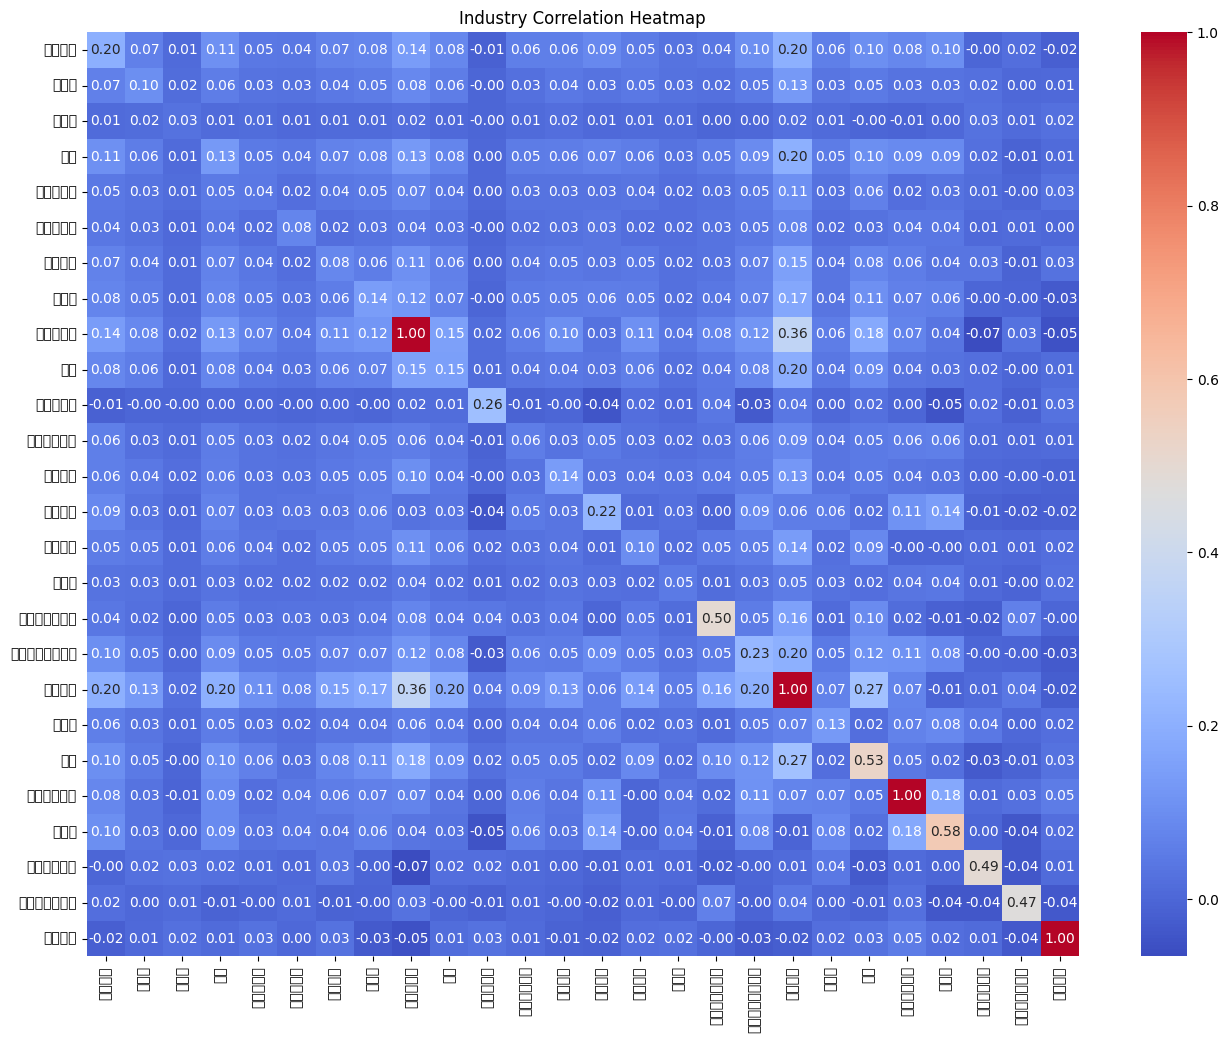

In [57]:
# 業種ごとの相関行列のヒートマップをプロット
plt.figure(figsize=(16, 12))
sns.heatmap(industry_correlation_matrix.astype(float), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Industry Correlation Heatmap")
plt.show()


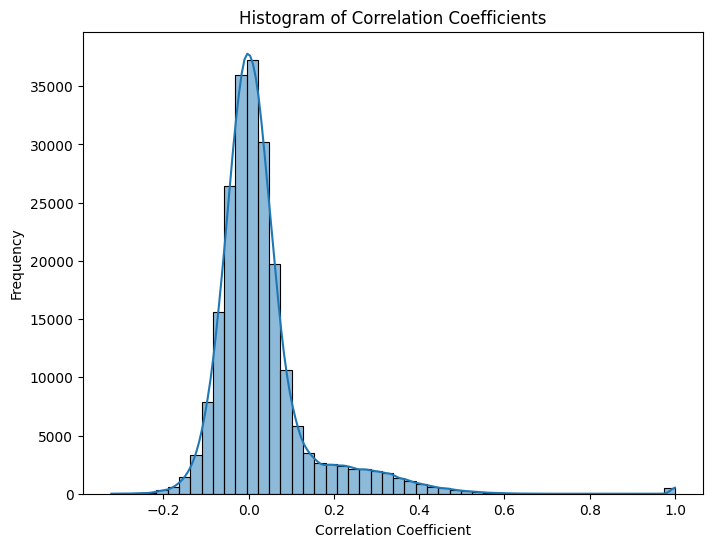

In [58]:
# 相関係数の頻度をヒストグラムでプロット
plt.figure(figsize=(8, 6))
sns.histplot(correlation_matrix.flatten(), bins=50, kde=True)
plt.xlabel("Correlation Coefficient")
plt.ylabel("Frequency")
plt.title("Histogram of Correlation Coefficients")
plt.show()